 Module 12 Challenge
 Deliverable 2: Scrape and Analyze Mars Weather Data


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

Step 2: Scrape the Data

In [2]:
# Define the URL of the Mars Temperature Data Site
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# Use requests to get the HTML content of the page
response = requests.get(url)

# Create a BeautifulSoup object and parse the HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table in the HTML
table = soup.find('table')

# Extract the table headers
headers = [header.text for header in table.find_all('th')]

# Extract the rows of the table
rows = table.find_all('tr')[1:]  # Skip the header row

# Extract the data from each row and create a list of lists
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Create a DataFrame from the scraped data
df = pd.DataFrame(data, columns=headers)

# Display the DataFrame
df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


Step 3: Data Cleaning and Type Conversion

In [3]:
# Check data types
df.info()

# Convert data types
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Display the DataFrame after type conversion
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
1,13,2012-08-17,11,156.0,6,-76.0,740.0
2,24,2012-08-18,12,156.0,6,-76.0,741.0
3,35,2012-08-19,13,157.0,6,-74.0,732.0
4,46,2012-08-20,14,157.0,6,-74.0,740.0


Step 4: Analyze the Data

In [4]:
num_months = df['month'].nunique()
print(f'There are {num_months} months on Mars.')


There are 12 months on Mars.


In [5]:
num_sols = df['sol'].nunique()
print(f'There are {num_sols} Martian days worth of data.')


There are 1867 Martian days worth of data.


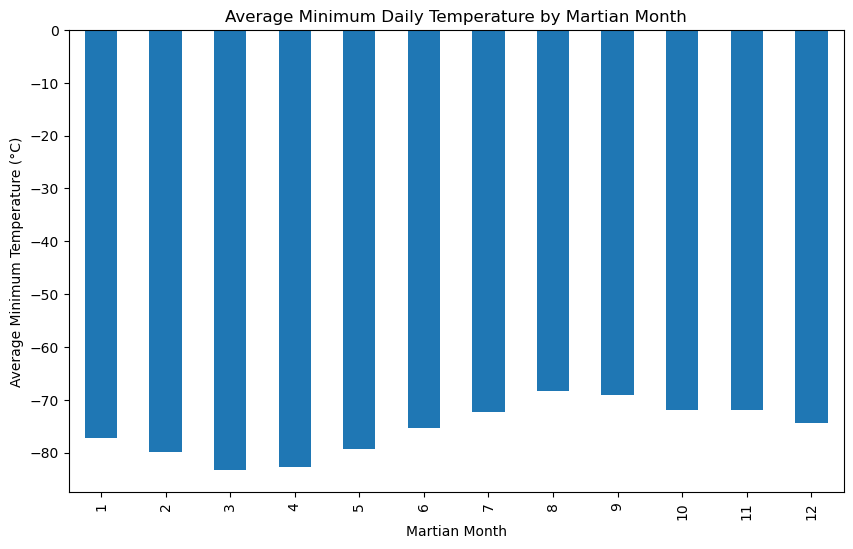

The coldest month on Mars is month 3.
The warmest month on Mars is month 8.


In [6]:
# Group by month and calculate the average minimum temperature
avg_min_temp_per_month = df.groupby('month')['min_temp'].mean()

# Plot the results
avg_min_temp_per_month.plot(kind='bar', figsize=(10, 6))
plt.title('Average Minimum Daily Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

# Find the coldest and warmest months
coldest_month = avg_min_temp_per_month.idxmin()
warmest_month = avg_min_temp_per_month.idxmax()
print(f'The coldest month on Mars is month {coldest_month}.')
print(f'The warmest month on Mars is month {warmest_month}.')


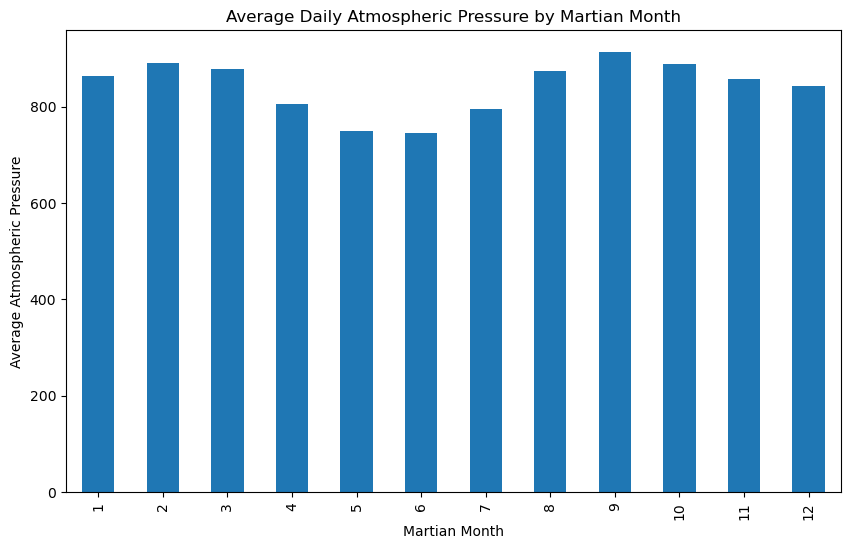

The month with the lowest atmospheric pressure on Mars is month 6.
The month with the highest atmospheric pressure on Mars is month 9.


In [7]:
# Group by month and calculate the average atmospheric pressure
avg_pressure_per_month = df.groupby('month')['pressure'].mean()

# Plot the results
avg_pressure_per_month.plot(kind='bar', figsize=(10, 6))
plt.title('Average Daily Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()

# Find the months with the lowest and highest atmospheric pressure
lowest_pressure_month = avg_pressure_per_month.idxmin()
highest_pressure_month = avg_pressure_per_month.idxmax()
print(f'The month with the lowest atmospheric pressure on Mars is month {lowest_pressure_month}.')
print(f'The month with the highest atmospheric pressure on Mars is month {highest_pressure_month}.')


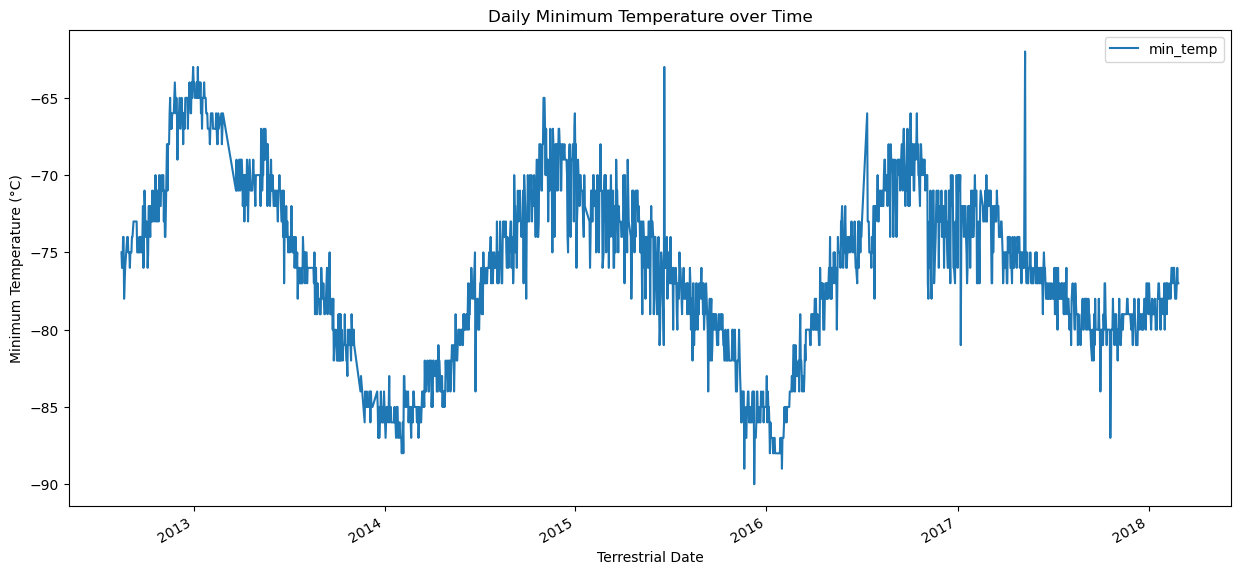

In [8]:
# Plot the daily minimum temperature to visually estimate the Martian year
df.plot(x='terrestrial_date', y='min_temp', figsize=(15, 7))
plt.title('Daily Minimum Temperature over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.show()


In [9]:
df.to_csv('mars_weather_data.csv', index=False)
